In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
input_file_all = '/content/drive/MyDrive/Project/ExtractedSegments.npy'

# Load the array from the .npy file
loaded_segments = np.load(input_file_all, allow_pickle=True)  # Use allow_pickle=True if the array contains objects

# Display the total number of segments loaded and a sample segment
print(f'Total segments loaded: {len(loaded_segments)}')
print(f'Sample segment: {loaded_segments[0]}')

Total segments loaded: 853
Sample segment: [[30.1185 -98.7709 -225.4447 ... 13.5285 -5.1689 -151.6765]
 [34.385 -105.6602 -176.2197 ... 10.3448 -14.044 -145.6031]
 [29.2237 -104.638 -158.7393 ... 0.7427 -19.204 -146.3018]
 ...
 [-1492.4415 2201.3511 1701.4327 ... -265.2208 1477.7418 139.9815]
 [-1696.6747 2532.1211 1735.0332 ... -281.5099 1696.9547 191.825]
 [-1761.7854 2661.7756 1789.5831 ... -263.3668 1793.6367 229.0546]]


In [ ]:
loaded_segments[0].shape

(625, 16)

In [ ]:
import numpy as np

# Specify the file path
input_file_all = '/content/drive/MyDrive/Project/ExtractedLabels.npy'

# Load the array from the .npy file
loaded_labels = np.load(input_file_all, allow_pickle=True)  # Use allow_pickle=True if the array contains objects

# Display the total number of segments loaded and a sample segment
print(f'Total Labels loaded: {len(loaded_labels)}')
print(f'Sample Label: {loaded_labels[0]}')

Total Labels loaded: 853
Sample Label: Walking


In [ ]:
loaded_segments[0].shape

(625, 16)

In [ ]:
data = loaded_segments

I have a date with dimensions (625, 16). 16 represents 16 channels, and 625 represents different time frames.

In [ ]:
import numpy as np

def compute_mean(data):
    return np.mean(data, axis=0)

mean_features = np.array([compute_mean(subject_data) for subject_data in loaded_segments])

In [ ]:
def compute_variance(data):
    return np.var(data, axis=0)

variance_features = np.array([compute_variance(subject_data) for subject_data in loaded_segments])

Mean of Absolute First Difference

In [ ]:
def compute_first_diff(data):
    return np.mean(np.abs(np.diff(data, axis=0)), axis=0)

first_diff_features = np.array([compute_first_diff(subject_data) for subject_data in loaded_segments])

Mean of Absolute Second Difference

In [ ]:
def compute_second_diff(data):
    return np.mean(np.abs(np.diff(data, n=2, axis=0)), axis=0)

second_diff_features = np.array([compute_second_diff(subject_data) for subject_data in loaded_segments])

In [ ]:
combined_time_features = np.concatenate(
    [mean_features, variance_features, first_diff_features, second_diff_features], axis=1)

In [ ]:
combined_time_features.shape

(853, 64)

In [ ]:
loaded_labels.shape

(853,)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.26
Confusion Matrix:
[[28 11  0  0  8]
 [37  8  2  0 10]
 [ 4  0  0  0  0]
 [ 3  1  0  0  0]
 [35 16  0  0  8]]
Classification Report:
                  precision    recall  f1-score   support

             Aha       0.26      0.60      0.36        47
Doing Other Task       0.22      0.14      0.17        57
         Impasse       0.00      0.00      0.00         4
   Re-evaluation       0.00      0.00      0.00         4
         Walking       0.31      0.14      0.19        59

        accuracy                           0.26       171
       macro avg       0.16      0.17      0.14       171
    weighted avg       0.25      0.26      0.22       171



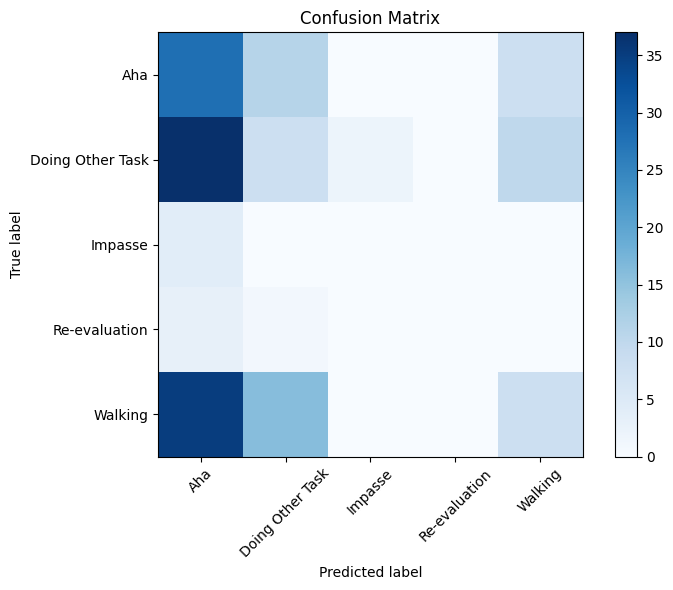

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming combined_time_features and loaded_labels are defined
# combined_time_features should be a 2D numpy array or DataFrame with shape (853, 64)
# loaded_labels should be a 1D array with shape (853,)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(combined_time_features, loaded_labels, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Logistic Regression model
model = LogisticRegression(max_iter=1000)  # Increase max_iter if needed
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
clf_report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(clf_report)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(np.unique(loaded_labels)))  # Adjust for number of classes
plt.xticks(tick_marks, np.unique(loaded_labels), rotation=45)
plt.yticks(tick_marks, np.unique(loaded_labels))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

Unique labels: ['Aha' 'Doing Other Task' 'Impasse' 'Re-evaluation' 'Walking']
Encoded labels: [4 0 1 2 3 2 2 4 0 1 4 0 1 4 0 1 2 4 0 1 4 0 1 4 0 1 0 1 4 0 1 4 0 1 4 0 1
 4 0 1 4 0 1 4 0 1 4 0 1 4 0 1 4 0 1 4 0 1 4 0 1 4 0 1 4 0 1 4 0 1 4 0 1 4
 0 1 4 0 1 4 0 1 4 0 1 4 0 1 4 0 1 4 0 1 4 0 1 4 0 1 4 0 1 0 1 4 0 1 3 4 0
 1 4 0 1 4 0 1 4 0 1 4 0 1 4 0 1 4 0 1 4 0 1 4 0 1 3 4 0 1 4 0 1 4 0 1 4 0
 1 4 0 1 4 0 1 4 0 1 4 0 1 4 0 1 4 0 1 2 3 4 0 4 0 1 4 0 1 4 0 1 4 0 1 4 0
 1 4 0 1 4 0 1 4 0 1 4 0 1 4 0 1 3 4 0 1 4 0 1 4 0 1 4 0 1 4 0 1 4 0 1 4 0
 1 4 0 1 4 0 1 4 0 1 4 0 1 3 4 0 1 4 0 1 4 0 1 4 0 1 4 0 1 4 0 1 4 0 1 4 0
 1 4 0 1 4 0 1 0 1 4 0 1 4 0 1 4 0 1 4 0 1 4 0 4 0 1 4 0 1 4 0 1 4 0 1 4 0
 1 4 0 1 4 0 1 3 4 0 1 4 0 1 4 0 1 4 0 1 4 0 1 4 0 1 4 0 1 4 0 1 4 0 1 4 0
 1 3 0 1 3 0 1 4 0 1 4 0 1 4 0 1 4 0 1 4 0 1 0 1 3 4 0 1 4 0 1 4 0 1 4 0 1
 3 0 1 4 0 4 0 1 4 0 1 4 0 1 2 3 0 1 4 0 1 4 0 1 4 0 1 4 0 1 4 0 1 4 0 1 3
 4 0 1 4 0 1 4 0 1 4 0 1 4 0 1 4 0 1 4 0 1 4 0 1 4 0 1 4 0 1 4 0 1 4 0 1 4
 0 1 0

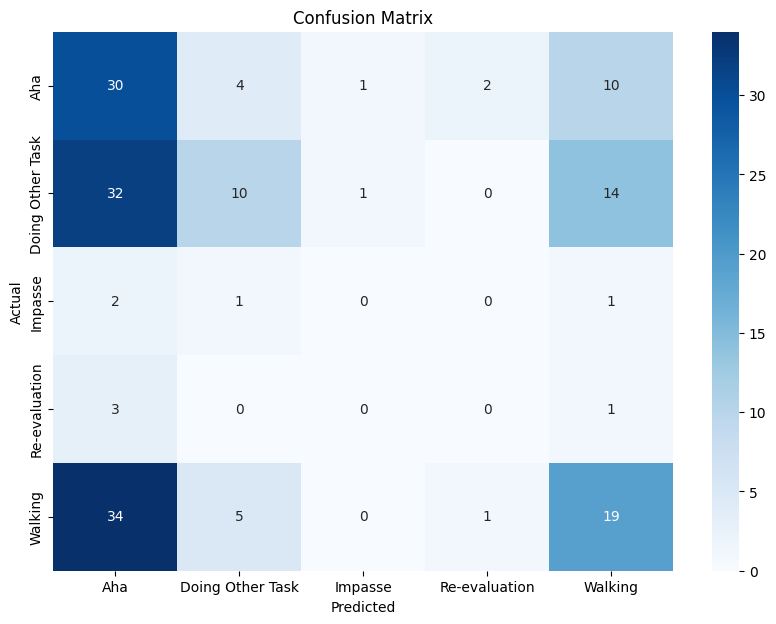

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming combined_features shape: (853, 112)
# Using loaded_labels as your labels
labels = loaded_labels  # Ensure this variable holds your label data

# Verify unique labels
print("Unique labels:", np.unique(labels))

# Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(labels)  # Convert labels to integers
print("Encoded labels:", y_encoded)

# Check number of classes
num_classes = len(np.unique(y_encoded))
print("Number of classes:", num_classes)

# One-hot encode the labels
y_categorical = to_categorical(y_encoded, num_classes=num_classes)  # Specify num_classes

# Reshape combined features for CNN
combined_features_reshaped = combined_time_features.reshape(-1, 64, 1, 1)

# Ensure the data types are correct
combined_features_reshaped = combined_features_reshaped.astype(np.float32)
y_categorical = y_categorical.astype(np.float32)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(combined_features_reshaped, y_categorical, test_size=0.2, random_state=42)

# Define the CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(64, 1, 1)),  # Input layer
    tf.keras.layers.Conv2D(32, (3, 1), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 1)),
    tf.keras.layers.Conv2D(64, (3, 1), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 1)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')  # Use num_classes here
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Make predictions on the test set
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)  # Get the index of the class with the highest probability

# Convert predictions back to original labels
y_pred_labels = label_encoder.inverse_transform(y_pred)

# Evaluate the model
conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), y_pred)  # Use the one-hot encoded true labels
print(conf_matrix)
print(classification_report(np.argmax(y_test, axis=1), y_pred, target_names=label_encoder.classes_))

# Calculate accuracy
accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import numpy as np
from scipy.signal import spectrogram

# Assuming 'loaded_segments' is your EEG data with shape (853, 625, 16)

def extract_frequency_features(segments):
    # Initialize a list to store the feature vectors for each subject
    feature_vectors = []

    for segment in segments:
        # Initialize a list to hold features for this segment
        channel_features = []

        # Iterate through each channel
        for channel_data in segment.T:  # Transpose to iterate over channels
            # Calculate the spectrogram for the current channel
            freqs, times, Sxx = spectrogram(channel_data, fs=125, nperseg=16)

            Sxx_magnitude = np.abs(Sxx)

            mean_power = np.mean(Sxx_magnitude)
            std_power = np.std(Sxx_magnitude)
            peak_freq = freqs[np.argmax(np.mean(Sxx_magnitude, axis=1))]
            # Append the features for this channel
            channel_features.extend([mean_power, std_power, peak_freq])

        # Append the feature vector for this segment
        feature_vectors.append(channel_features)

    return np.array(feature_vectors)

# Extract frequency features
frequency_features = extract_frequency_features(loaded_segments)

# The shape of 'frequency_features' will be (853, 48), assuming 3 features per channel (16 channels)
print(frequency_features.shape)

(853, 48)


In [ ]:
frequency_features.shape

(853, 48)

Unique labels: ['Aha' 'Doing Other Task' 'Impasse' 'Re-evaluation' 'Walking']
Encoded labels: [4 0 1 2 3 2 2 4 0 1 4 0 1 4 0 1 2 4 0 1 4 0 1 4 0 1 0 1 4 0 1 4 0 1 4 0 1
 4 0 1 4 0 1 4 0 1 4 0 1 4 0 1 4 0 1 4 0 1 4 0 1 4 0 1 4 0 1 4 0 1 4 0 1 4
 0 1 4 0 1 4 0 1 4 0 1 4 0 1 4 0 1 4 0 1 4 0 1 4 0 1 4 0 1 0 1 4 0 1 3 4 0
 1 4 0 1 4 0 1 4 0 1 4 0 1 4 0 1 4 0 1 4 0 1 4 0 1 3 4 0 1 4 0 1 4 0 1 4 0
 1 4 0 1 4 0 1 4 0 1 4 0 1 4 0 1 4 0 1 2 3 4 0 4 0 1 4 0 1 4 0 1 4 0 1 4 0
 1 4 0 1 4 0 1 4 0 1 4 0 1 4 0 1 3 4 0 1 4 0 1 4 0 1 4 0 1 4 0 1 4 0 1 4 0
 1 4 0 1 4 0 1 4 0 1 4 0 1 3 4 0 1 4 0 1 4 0 1 4 0 1 4 0 1 4 0 1 4 0 1 4 0
 1 4 0 1 4 0 1 0 1 4 0 1 4 0 1 4 0 1 4 0 1 4 0 4 0 1 4 0 1 4 0 1 4 0 1 4 0
 1 4 0 1 4 0 1 3 4 0 1 4 0 1 4 0 1 4 0 1 4 0 1 4 0 1 4 0 1 4 0 1 4 0 1 4 0
 1 3 0 1 3 0 1 4 0 1 4 0 1 4 0 1 4 0 1 4 0 1 0 1 3 4 0 1 4 0 1 4 0 1 4 0 1
 3 0 1 4 0 4 0 1 4 0 1 4 0 1 2 3 0 1 4 0 1 4 0 1 4 0 1 4 0 1 4 0 1 4 0 1 3
 4 0 1 4 0 1 4 0 1 4 0 1 4 0 1 4 0 1 4 0 1 4 0 1 4 0 1 4 0 1 4 0 1 4 0 1 4
 0 1 0

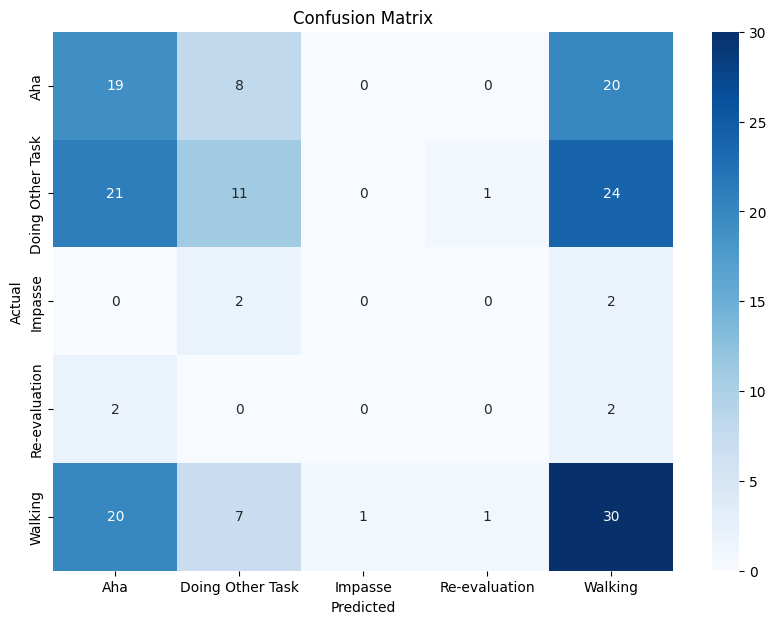

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming combined_features shape: (853, 112)
# Using loaded_labels as your labels
labels = loaded_labels  # Ensure this variable holds your label data

# Verify unique labels
print("Unique labels:", np.unique(labels))

# Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(labels)  # Convert labels to integers
print("Encoded labels:", y_encoded)

# Check number of classes
num_classes = len(np.unique(y_encoded))
print("Number of classes:", num_classes)

# One-hot encode the labels
y_categorical = to_categorical(y_encoded, num_classes=num_classes)  # Specify num_classes

# Reshape combined features for CNN
combined_freq_features_reshaped = frequency_features.reshape(-1, 48, 1, 1)

# Ensure the data types are correct
combined_freq_features_reshaped = combined_freq_features_reshaped.astype(np.float32)
y_categorical = y_categorical.astype(np.float32)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(combined_freq_features_reshaped, y_categorical, test_size=0.2, random_state=42)

# Define the CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(48, 1, 1)),  # Input layer
    tf.keras.layers.Conv2D(32, (3, 1), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 1)),
    tf.keras.layers.Conv2D(64, (3, 1), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 1)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')  # Use num_classes here
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Make predictions on the test set
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)  # Get the index of the class with the highest probability

# Convert predictions back to original labels
y_pred_labels = label_encoder.inverse_transform(y_pred)

# Evaluate the model
conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), y_pred)  # Use the one-hot encoded true labels
print(conf_matrix)
print(classification_report(np.argmax(y_test, axis=1), y_pred, target_names=label_encoder.classes_))

# Calculate accuracy
accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

**EEGnet**

In [ ]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load your dataset
input_file_all = '/content/drive/MyDrive/Project/ExtractedSegments.npy'
loaded_segments = np.load(input_file_all, allow_pickle=True)

input_labels_all = '/content/drive/MyDrive/Project/ExtractedLabels.npy'
loaded_labels = np.load(input_labels_all, allow_pickle=True)

# Data inspection
print(f'Total segments loaded: {len(loaded_segments)}')
print(f'Sample segment shape: {loaded_segments[0].shape}')
print(f'Total labels loaded: {len(loaded_labels)}')
print(f'Sample label: {loaded_labels[0]}')

# Filter out inconsistent segments
filtered_segments = []
filtered_labels = []

for i in range(len(loaded_segments)):
    if loaded_segments[i].shape == (625, 16):
        filtered_segments.append(loaded_segments[i])
        filtered_labels.append(loaded_labels[i])
    else:
        print(f"Inconsistent shape for segment {i}: {loaded_segments[i].shape}")

# Convert to NumPy arrays
filtered_segments = np.array(filtered_segments, dtype=np.float32)
filtered_labels = np.array(filtered_labels)

# Verify the filtered data
print(f'Filtered segments shape: {filtered_segments.shape}')
print(f'Filtered labels shape: {filtered_labels.shape}')

# Check the type and dtype again
print(type(filtered_segments), filtered_segments.dtype)  # Should be <class 'numpy.ndarray'> float32
print(type(filtered_labels), filtered_labels.dtype)      # Should be <class 'numpy.ndarray'> object

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(filtered_segments, filtered_labels, test_size=0.2, random_state=42)

# Reshape the data to match the EEGNet input format (samples, channels, time_points)
X_train = np.expand_dims(X_train, axis=-1)  # Add a channel dimension for Conv2D
X_test = np.expand_dims(X_test, axis=-1)

X_train = X_train.reshape(-1, 16, 625, 1)
X_test = X_test.reshape(-1, 16, 625, 1)

# Encode labels (assuming labels are categorical like 'Walking', 'Thinking', etc.)
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

# Convert labels to categorical
num_classes = len(np.unique(y_train))  # Adjust based on your dataset
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# EEGNet architecture (same as before)
def EEGNet(nb_classes, Chans=16, Samples=625):
    input1 = layers.Input(shape=(Chans, Samples, 1))  # (16, 625, 1)

    # First block
    block1 = layers.Conv2D(16, (1, 64), padding='same')(input1)
    block1 = layers.BatchNormalization()(block1)
    block1 = layers.DepthwiseConv2D((Chans, 1), use_bias=False, depth_multiplier=2)(block1)
    block1 = layers.BatchNormalization()(block1)
    block1 = layers.Activation('elu')(block1)
    block1 = layers.AveragePooling2D((1, 4))(block1)
    block1 = layers.Dropout(0.25)(block1)

    # Second block
    block2 = layers.SeparableConv2D(16, (1, 16), padding='same')(block1)
    block2 = layers.BatchNormalization()(block2)
    block2 = layers.Activation('elu')(block2)
    block2 = layers.AveragePooling2D((1, 8))(block2)
    block2 = layers.Dropout(0.25)(block2)

    # Classification block
    flatten = layers.Flatten()(block2)
    dense = layers.Dense(nb_classes, kernel_constraint=tf.keras.constraints.max_norm(0.25))(flatten)
    softmax = layers.Activation('softmax')(dense)

    return models.Model(inputs=input1, outputs=softmax)

# Model parameters
nb_classes = y_train.shape[1]  # Number of label classes
model = EEGNet(nb_classes=nb_classes, Chans=16, Samples=625)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
print(model.summary())

# Train the model
model.fit(X_train, y_train, batch_size=64, epochs=100, validation_data=(X_test, y_test))

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

Total segments loaded: 853
Sample segment shape: (625, 16)
Total labels loaded: 853
Sample label: Walking
Inconsistent shape for segment 25: (697, 16)
Inconsistent shape for segment 34: (626, 16)
Inconsistent shape for segment 35: (624, 16)
Inconsistent shape for segment 36: (626, 16)
Inconsistent shape for segment 61: (626, 16)
Inconsistent shape for segment 62: (624, 16)
Inconsistent shape for segment 63: (626, 16)
Inconsistent shape for segment 94: (624, 16)
Inconsistent shape for segment 95: (626, 16)
Inconsistent shape for segment 96: (624, 16)
Inconsistent shape for segment 97: (626, 16)
Inconsistent shape for segment 98: (1870, 16)
Inconsistent shape for segment 102: (737, 16)
Inconsistent shape for segment 133: (626, 16)
Inconsistent shape for segment 134: (624, 16)
Inconsistent shape for segment 135: (626, 16)
Inconsistent shape for segment 153: (1983, 16)
Inconsistent shape for segment 171: (733, 16)
Inconsistent shape for segment 172: (626, 16)
Inconsistent shape for segment

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)          │ (None, 16, 625, 1)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 16, 625, 16)         │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 16, 625, 16)         │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ depthwise_conv2d_5 (DepthwiseConv2D) │ (None, 1, 625, 32)          │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 1, 625, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_15 (Activation)           │ (None, 1, 625, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_10                 │ (None, 1, 156, 32)          │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 1, 156, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ separable_conv2d_5 (SeparableConv2D) │ (None, 1, 156, 16)          │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 1, 156, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_16 (Activation)           │ (None, 1, 156, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_11                 │ (None, 1, 19, 16)           │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 1, 19, 16)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 304)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 5)                   │           1,525 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_17 (Activation)           │ (None, 5)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,373 (17.08 KB)

 Trainable params: 4,245 (16.58 KB)

 Non-trainable params: 128 (512.00 B)

None
Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 879ms/step - accuracy: 0.3055 - loss: 1.6051 - val_accuracy: 0.2500 - val_loss: 1.6060
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.3203 - loss: 1.4795 - val_accuracy: 0.2635 - val_loss: 1.5923
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 18s 874ms/step - accuracy: 0.3001 - loss: 1.4144 - val_accuracy: 0.2770 - val_loss: 1.5601
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 786ms/step - accuracy: 0.3360 - loss: 1.3705 - val_accuracy: 0.2838 - val_loss: 1.5284
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.3661 - loss: 1.3278 - val_accuracy: 0.2973 - val_loss: 1.5010
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 796ms/step - accuracy: 0.3102 - loss: 1.3219 - val_accuracy: 0.2973 - val_loss: 1.4720
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 770ms/step - accuracy: 0.3969 - loss: 1.3219 - val_accuracy: 0.2973 - val_loss: 1.4500
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.3725 - loss: 1.3000 - val_ac

In [ ]:
model.save('my_model.keras')

In [ ]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - accuracy: 0.2940 - loss: 1.5162
Test accuracy: 0.2635135054588318


In [ ]:
# Get predictions from the model
y_pred_prob = model.predict(X_test)

# Convert probabilities to class labels (assuming a multi-class classification problem)
y_pred_classes = np.argmax(y_pred_prob, axis=1)

5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 269ms/step


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Assuming y_test is encoded as integers; if not, you might need to encode it
# Get the true class labels
y_true_classes = np.argmax(y_test, axis=1)  # Only if y_test is one-hot encoded

# Print classification report
print(classification_report(y_true_classes, y_pred_classes))

# Print confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
print("Confusion Matrix:\n", conf_matrix)

              precision    recall  f1-score   support

           0       0.27      0.63      0.38        43
           1       0.21      0.16      0.18        44
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         4
           4       0.36      0.09      0.14        55

    accuracy                           0.26       148
   macro avg       0.17      0.18      0.14       148
weighted avg       0.27      0.26      0.22       148

Confusion Matrix:
 [[27 11  0  0  5]
 [33  7  0  0  4]
 [ 2  0  0  0  0]
 [ 2  2  0  0  0]
 [36 14  0  0  5]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
